In [1]:
import os
import json
import string
import io
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from fastapi.responses import StreamingResponse

In [11]:
# Function to clean and preprocess text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Get stopwords
    stop_words = set(stopwords.words('english'))
    
    # Separate words and stopwords
    words = text.split()
    cleaned_words = [word for word in words if word not in stop_words]
    removed_stopwords = [word for word in words if word in stop_words]
    
    return ' '.join(cleaned_words), ' '.join(removed_stopwords)


In [15]:
def generate_histograms(base_dir):
    if not os.path.exists(base_dir):
        return None  # Return None if the directory does not exist

    all_cleaned_text = []
    all_stopwords = []

    # Traverse through each video folder in the base directory
    for video_folder in os.listdir(base_dir):
        video_path = os.path.join(base_dir, video_folder)
        metadata_path = os.path.join(video_path, 'metadata.json')
        
        # Check if metadata.json exists in the folder
        if os.path.exists(metadata_path):
            with open(metadata_path, 'r') as f:
                # Read the metadata file line by line (each line is a separate JSON object)
                for line in f:
                    data = json.loads(line)
                    cleaned_text, stopwords_text = clean_text(data['text'])
                    all_cleaned_text.append(cleaned_text)
                    all_stopwords.append(stopwords_text)

    # Combine all the cleaned text and stopwords into single strings
    combined_cleaned_text = ' '.join(all_cleaned_text)
    combined_stopwords = ' '.join(all_stopwords)
    
    # Count word frequencies
    word_freq = Counter(combined_cleaned_text.split())
    stopword_freq = Counter(combined_stopwords.split())
    
    # Get the top 20 most common words and stopwords
    top_words = dict(word_freq.most_common(50))
    top_stopwords = dict(stopword_freq.most_common(50))
    
    # Create histograms
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
    
    # Histogram for cleaned words
    ax1.bar(top_words.keys(), top_words.values())
    ax1.set_title('Top 50 Most Common Words (Stopwords Removed)')
    ax1.set_xlabel('Words')
    ax1.set_ylabel('Frequency')
    ax1.tick_params(axis='x', rotation=45)
    
    # Histogram for stopwords
    ax2.bar(top_stopwords.keys(), top_stopwords.values())
    ax2.set_title('Top 50 Most Common Stopwords')
    ax2.set_xlabel('Stopwords')
    ax2.set_ylabel('Frequency')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

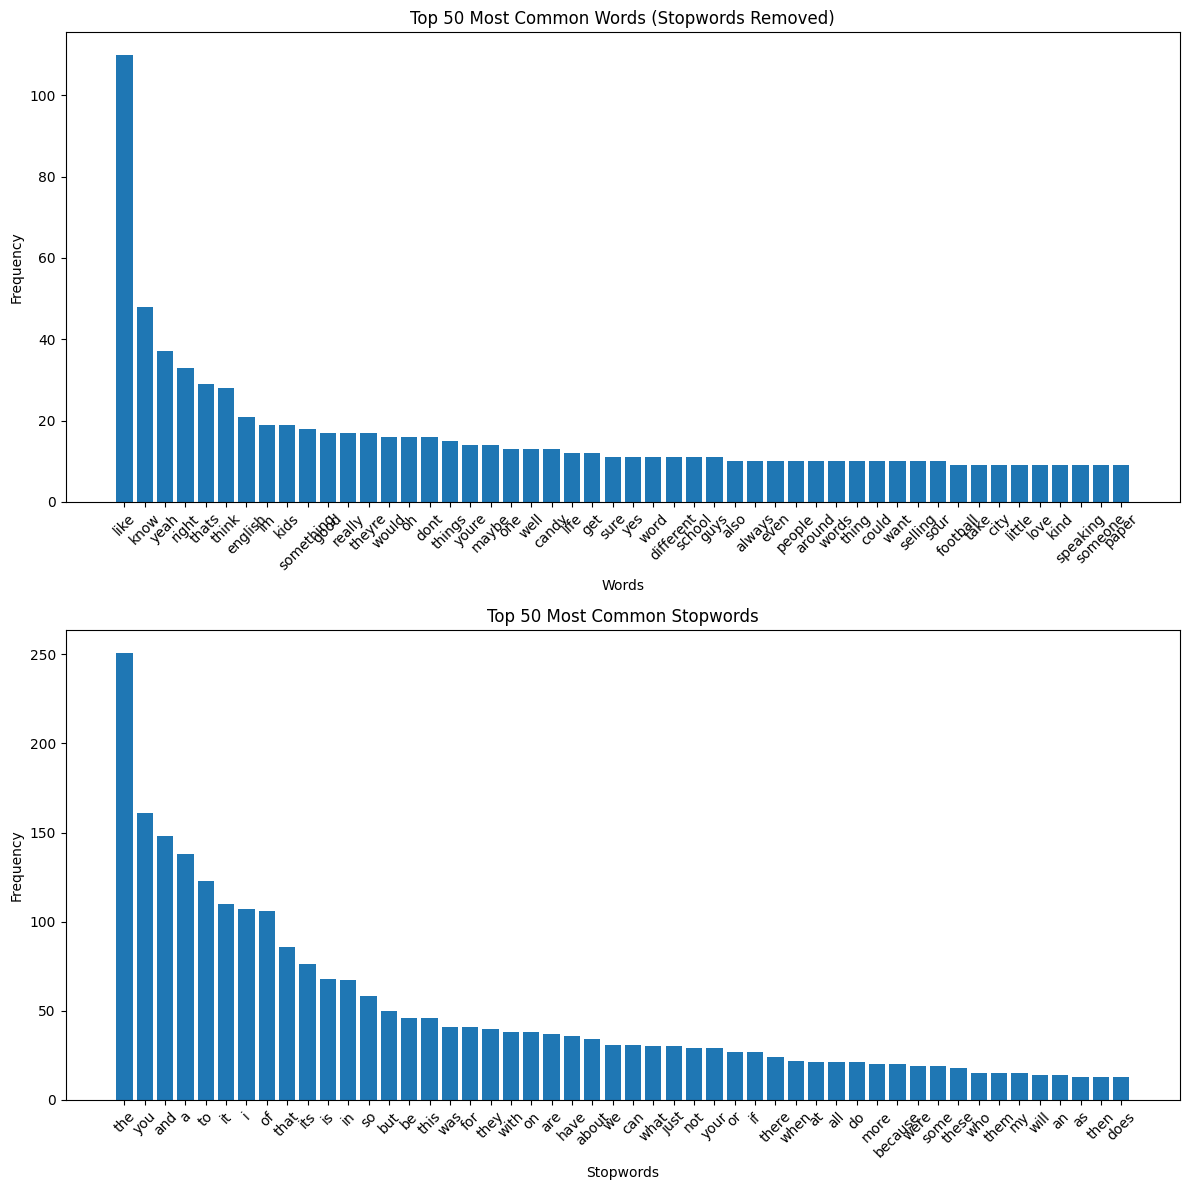

In [16]:
base_dir = 'audio_files/english'
generate_histograms(base_dir)